In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import graphviz
import json
from sklearn.tree import export_graphviz
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


   * **date** - the date the challenge set was generated. This should be "2018-01-16 08:47:28.198015"
   * **version** - the version of the challenge set. This should be "v1"
   * **playlists** - an array of 10,000 incomplete playlists. Each element in this array contains the following fields:
      * **pid** - the playlist ID
      * **name** - (optional) - the name of the playlist. For some challenge playlists, the name will be missing.
      * **num_holdouts** - the number of tracks that have been omitted from the playlist
      * **tracks** - a (possibly empty) array of tracks that are in the playlist. Each element of this array contains the following fields:
         * **pos** - the position of the track in the playlist (zero offset)
         * **track_name** - the name of the track
         * **track_uri** - the Spotify URI of the track
         * **artist_name** - the name of the primary artist of the track
         * **artist_uri** - the Spotify URI of the primary artist of the track
         * **album_name** - the name of the album that the track is on
         * **album_uri** -- the Spotify URI of the album that the track is on
         * **duration_ms** - the duration of the track in milliseconds
      * **num_samples** the number of tracks included in the playlist
      * **num_tracks** - the total number of tracks in the playlist.

PREPARING DATASET

In [2]:

# Load the JSON data into a Python object
with open("/content/drive/MyDrive/archive/challenge_set.json", "r") as file:
    data = json.load(file)

# Extract the "playlists" data from the JSON object
playlists_data = data["playlists"]

# Convert the list of dictionaries into a DataFrame
data_set = pd.DataFrame(playlists_data)

# Now, data_set contains your playlist data in a Pandas DataFrame
data_set


,name,num_holdouts,pid,num_tracks,tracks,num_samples
0,spanish playlist,11,1000002,11,[],0
1,Groovin,48,1000003,48,[],0
2,uplift,40,1000004,40,[],0
3,WUBZ,27,1000006,27,[],0
4,new,41,1000007,41,[],0
...,...,...,...,...,...,...
9995,Playlist 2015,20,1006767,21,"[{'pos': 0, 'artist_name': 'El Gran Combo De P...",1
9996,Workout,24,1006771,25,"[{'pos': 0, 'artist_name': '2Pac', 'track_uri'...",1
9997,Girlz,16,1006773,17,"[{'pos': 0, 'artist_name': 'Ashley DuBose', 't...",1
9998,let's get lost,35,1006775,36,"[{'pos': 0, 'artist_name': 'blackbear', 'track...",1


In [3]:
nuevo_datset = ["name", "pid", "num_tracks"]
data_set = data_set[nuevo_datset]
data_set

,name,pid,num_tracks
0,spanish playlist,1000002,11
1,Groovin,1000003,48
2,uplift,1000004,40
3,WUBZ,1000006,27
4,new,1000007,41
...,...,...,...
9995,Playlist 2015,1006767,21
9996,Workout,1006771,25
9997,Girlz,1006773,17
9998,let's get lost,1006775,36


In [4]:
data_set = data_set.dropna()

bins = [10, 39, 168, 250]
labels = ['Short playlist', 'Median playlist', "Big playlist"]
data_set['Clasification'] = pd.cut(data_set['num_tracks'], bins=bins, labels=labels)

label_encoder = LabelEncoder()
data_set['Clasification'] = label_encoder.fit_transform(data_set['Clasification'])

X = data_set.iloc[:, 1:3].values
Y = data_set.iloc[:, 3].values

data_set

<ipython-input-4-c7d2e9d8b18d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Clasification'] = pd.cut(data_set['num_tracks'], bins=bins, labels=labels)
<ipython-input-4-c7d2e9d8b18d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Clasification'] = label_encoder.fit_transform(data_set['Clasification'])


,name,pid,num_tracks,Clasification
0,spanish playlist,1000002,11,2
1,Groovin,1000003,48,1
2,uplift,1000004,40,1
3,WUBZ,1000006,27,2
4,new,1000007,41,1
...,...,...,...,...
9995,Playlist 2015,1006767,21,2
9996,Workout,1006771,25,2
9997,Girlz,1006773,17,2
9998,let's get lost,1006775,36,2


In [5]:
data_set.describe()

,pid,num_tracks,Clasification
count,8.000000e+03,8000.000000,8000.000000
mean,1.012000e+06,106.677875,1.010750
std,1.299750e+04,70.714890,0.722461
min,1.000000e+06,10.000000,0.000000
25%,1.002820e+06,39.000000,1.000000
50%,1.007136e+06,100.500000,1.000000
75%,1.014389e+06,168.000000,2.000000
max,1.049360e+06,250.000000,3.000000


A decision tree is a non-parametric supervised learning algorithm for classification and regression tasks. It has a hierarchical tree structure consisting of a root node, branches, internal nodes, and leaf nodes. Decision trees are used for classification and regression tasks, providing easy-to-understand models.

A decision tree is a hierarchical model used in decision support that depicts decisions and their potential outcomes, incorporating chance events, resource expenses, and utility. This algorithmic model utilizes conditional control statements and is non-parametric, supervised learning, useful for both classification and regression tasks. The tree structure is comprised of a root node, branches, internal nodes, and leaf nodes, forming a hierarchical, tree-like structure.

PREPARING LABELS AND STARTING MODEL

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Tree = DecisionTreeClassifier()
Tree.fit(X_train, Y_train)
Tree.score(X_train, Y_train)


1.0

In [7]:
# Convert class labels back to their original names
class_labels = label_encoder.inverse_transform(data_set['Clasification'])

In [8]:
# Export the trained decision tree to DOT format
dot_data = export_graphviz(Tree, out_file=None,
                            feature_names=['pid', 'num_tracks'],
                            class_names=class_labels,  # Use the converted class labels
                            filled=True, rounded=True,
                            special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("playlist_tree")



'playlist_tree.pdf'

PRINTING GRAPH

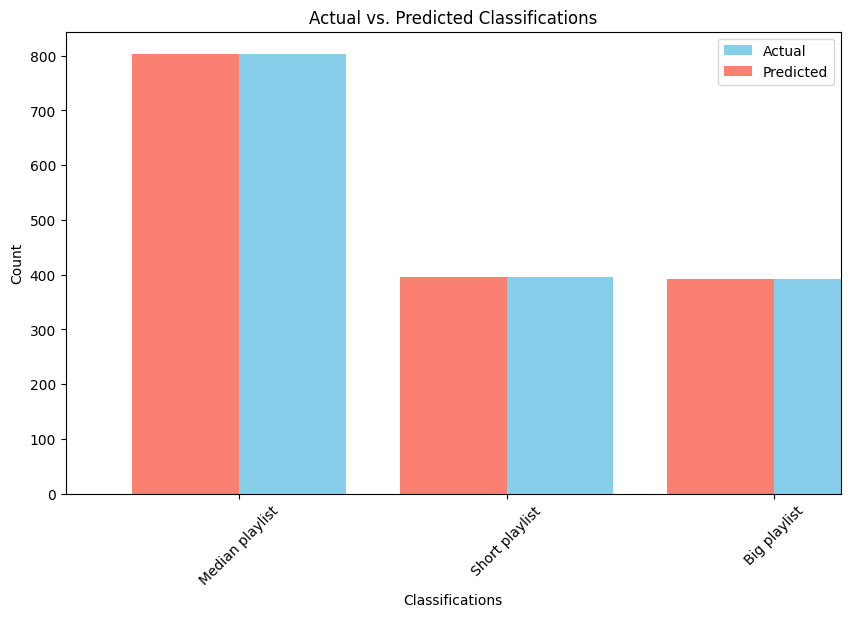

In [9]:
# Predictions on the test set
Y_pred = Tree.predict(X_test)

# Compare actual vs. predicted classifications
compare_df = pd.DataFrame({'Actual': label_encoder.inverse_transform(Y_test), 'Predicted': label_encoder.inverse_transform(Y_pred)})

# Define colors for actual and predicted classifications
actual_color = 'skyblue'
predicted_color = 'salmon'

# Plot a bar chart to visualize the comparisons with different colors
plt.figure(figsize=(10, 6))
compare_df['Actual'].value_counts().plot(kind='bar', color=actual_color, position=0, width=0.4, label='Actual')
compare_df['Predicted'].value_counts().plot(kind='bar', color=predicted_color, position=1, width=0.4, label='Predicted')

plt.xlabel('Classifications')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Classifications')
plt.xticks(rotation=45)
plt.legend()
plt.show()

